In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import pickle

from HashtagRecommenderModel import HashtagRecommender, split_file, join_file

In [2]:
data_path = 'data'
hr = HashtagRecommender(data_path=data_path)
images_names = hr.images_names
train_images_names, test_images_names = train_test_split(images_names, test_size=0.2, random_state=42)

In [3]:
hr.fit(train_images_names)

In [35]:
hashtags_predictions = hr.predict_hashtags(hr.base_images_path + train_images_names[1], num_neighbors=20, num_predict=5)
hashtags_predictions.values[0]

['love', 'instagood', 'photooftheday', 'instagram', 'follow']

In [8]:
hashtags_predictions = hr.predict_hashtags(hr.base_images_path + train_images_names[1], num_neighbors=20, num_predict=5, selected_hashtags=['nature'])
hashtags_predictions.values[0]

['photooftheday', 'instagood', 'love', 'picoftheday', 'beautiful']

In [14]:
print(hr.full_data.loc[train_images_names[1]].hashtags)

['Canon', 'beautiful', 'flora', 'instagram', 'nature', 'naturephotography', 'photography', 'photooftheday', 'summer']


In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def show_results(image_path, true_tags, rec_tags):
    img = mpimg.imread(image_path)
    plt.figure(figsize=(5, 5))  
    plt.axis('off')
    plt.imshow(img)
    print("Original Hashtags:\n",", ".join(map(lambda x: '#'+x, true_tags)))
    print("Recommended Hashtags:\n",", ".join(map(lambda x: '#'+x, rec_tags)))

Original Hashtags:
 #love, #followback, #instagramers, #me, #tweegram, #photooftheday, #20likes, #amazing, #smile, #follow4follow, #like4like, #look, #instalike, #igers, #picoftheday, #food, #instadaily, #instafollow, #followme, #girl, #instagood, #bestoftheday, #instacool, #meco, #follow, #colorful, #style
Recommended Hashtags:
 #instagood, #photooftheday, #love, #picoftheday, #instadaily, #beautiful, #nature, #instalike, #followme, #happy


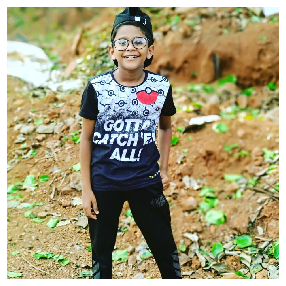

In [39]:
img = 'B_2VwQBAXxq.jpg'
hashtags_predictions = hr.predict_hashtags(hr.base_images_path + img, num_neighbors=20, num_predict=10).values[0]
show_results(hr.base_images_path + img, 
            hr.full_data.loc[img].hashtags,
            hashtags_predictions
            )